In [1]:
import torch
from torch import nn
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.constants import G
import pickle

c:\Users\Anurag Kadam\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Constants

kpc = 3.08567758128e19
km = 1e3
km_sq = 1e6

m0 = 1.9885e30  # mass of sun
h = 0.671
rho_crit = 143.84 * m0 / (kpc**3)
multip_constant = h / (10**12 * m0)


In [3]:
SPARC_columns = ["ID", "R", "Vobs", "e_Vobs", "Vgas", "Vdisk", "Vbul"]
SPARC = pd.read_csv("SPARC_formatted.csv")

In [4]:
# galaxy grps


All_gals = list(set(SPARC["ID"]))


# grp A


A_grp = [
    "F568-V1",
    "NGC0024",
    "NGC2683",
    "NGC2915",
    "NGC3198",
    "NGC3521",
    "NGC3769",
    "NGC3893",
    "NGC3949",
    "NGC3953",

]


A_m200 = np.array([5.43, 2.75, 4.38, 1.31, 4.65, 17.65, 2.66, 12.05, 18.98, 3.69]) * (
    m0 * 10**11
)


A_gam_D = np.array([0.63, 0.79, 0.68, 0.32, 0.52, 0.51, 0.36, 0.49, 0.37, 0.65])


A_gam_B = np.array([0.52])


# grp B

B_grp = [
    "NGC3992",
    "NGC4051",
    "NGC4088",
    "NGC4100",
    "NGC4138",
    "NGC4157",
    "NGC4183",
    "NGC4559",
    "NGC5005",
    "NGC6503",
]


B_m200 = np.array([15.28, 2.72, 4.62, 5.18, 4.04, 8.21, 1.43, 2.33, 84.90, 2.36]) * (
    m0 * 10**11
)

B_gam_D = np.array([0.77, 0.43, 0.31, 0.72, 0.71, 0.38, 0.67, 0.33, 0.44, 0.53])

B_gam_B = np.array([0.53, 0.46, 0.51])


# grp C

C_grp = [
    "UGC06983",
    "UGC07261",
    "UGC07690",
    "UGC07866",
    "UGC08490",
    "UGC08550",
    "UGC08699",
    "UGC09992",
    "UGC10310",
    "UGC12506",
]

C_m200 = np.array([2.16, 0.64, 0.21, 0.03, 0.87, 0.27, 8.22, 0.03, 0.43, 19.76]) * (
    m0 * 10**11
)

C_gam_D = np.array([0.65, 0.57, 0.70, 0.43, 0.79, 0.63, 0.77, 0.47, 0.54, 0.79])

C_gam_B = np.array([0.67])


# grp D


D_grp = [
    "NGC7331",
    "NGC7793",
    "NGC7814",
    "UGC02259",
    "UGC03546",
    "UGC06446",
    "UGC06930",
    "UGC06983",
    "UGC07261",
    "UGC07690",
]


D_m200 = np.array([20.56,1.01,21.39,0.75,9.33,0.56,1.19,1.65,0.34,0.10]) * (
    m0 * 10**11
)

D_gam_D = np.array([0.32,0.41,0.76,0.72,0.55,0.50,0.40,0.40,0.49,0.66])

D_gam_B = np.array([0.49, 0.60, 0.38])



In [5]:
# galaxies to be optimized for

grp_selection_dict = {
    "A_grp": A_grp,
    "A_m200": A_m200,
    "A_gam_D": A_gam_D,
    "A_gam_B": A_gam_B,
    "B_grp": B_grp,
    "B_m200": B_m200,
    "B_gam_D": B_gam_D,
    "B_gam_B": B_gam_B,
    "C_grp": C_grp,
    "C_m200": C_m200,
    "C_gam_D": C_gam_D,
    "C_gam_B": C_gam_B,
    "D_grp": D_grp,
    "D_m200": D_m200,
    "D_gam_D": D_gam_D,
    "D_gam_B": D_gam_B,
}


grp_to_use = "B"

gals_grp = grp_selection_dict[f'{grp_to_use}_grp']

init_m200 = grp_selection_dict[f'{grp_to_use}_m200']

init_gam_D = grp_selection_dict[f'{grp_to_use}_gam_D']

init_gam_B = grp_selection_dict[f'{grp_to_use}_gam_B']

In [6]:
data_processing_done = False


In [7]:
if not data_processing_done:
    SPARC = SPARC[SPARC["ID"].isin(gals_grp)].reset_index()[SPARC_columns]
    SI_SPARC = SPARC.copy()

    multipliers = [kpc, km, km, km, km, km]
    for n, i in enumerate(multipliers):
        SI_SPARC[SPARC_columns[n + 1]] = SPARC[SPARC_columns[n + 1]] * i

    for col in ["Vgas", "Vdisk", "Vbul"]:
        SI_SPARC[col + "_sq"] = SI_SPARC[col] ** 2

    for col in ["Vgas", "Vdisk", "Vbul"]:
        SPARC[col + "_sq"] = SPARC[col] ** 2

    SPARC_columns += list(SI_SPARC.columns)[-3:]
    data_processing_done = True

In [8]:

SPARC[:10]

,ID,R,Vobs,e_Vobs,Vgas,Vdisk,Vbul,Vgas_sq,Vdisk_sq,Vbul_sq
0,NGC3992,9.19,248.0,7.0,0.00,218.11,0.0,0.0000,47571.9721,0.0
1,NGC3992,13.79,264.0,6.6,6.57,246.64,0.0,43.1649,60831.2896,0.0
2,NGC3992,18.35,272.0,5.7,31.53,243.17,0.0,994.1409,59131.6489,0.0
3,NGC3992,22.94,271.0,5.7,46.25,231.91,0.0,2139.0625,53782.2481,0.0
4,NGC3992,27.52,264.0,5.3,52.31,206.95,0.0,2736.3361,42828.3025,0.0
5,NGC3992,32.11,242.0,7.4,49.34,187.25,0.0,2434.4356,35062.5625,0.0
6,NGC3992,36.70,244.0,5.3,46.74,173.25,0.0,2184.6276,30015.5625,0.0
7,NGC3992,41.44,241.0,6.2,45.26,161.14,0.0,2048.4676,25966.0996,0.0
8,NGC3992,46.02,237.0,8.6,44.89,151.17,0.0,2015.1121,22852.3689,0.0
9,NGC4051,1.74,121.0,14.8,0.00,169.00,0.0,0.0000,28561.0000,0.0


In [9]:
SI_SPARC[:10]

,ID,R,Vobs,e_Vobs,Vgas,Vdisk,Vbul,Vgas_sq,Vdisk_sq,Vbul_sq
0,NGC3992,2.835738e+20,248000.0,7000.0,0.0,218110.0,0.0,0.000000e+00,4.757197e+10,0.0
1,NGC3992,4.255149e+20,264000.0,6600.0,6570.0,246640.0,0.0,4.316490e+07,6.083129e+10,0.0
2,NGC3992,5.662218e+20,272000.0,5700.0,31530.0,243170.0,0.0,9.941409e+08,5.913165e+10,0.0
3,NGC3992,7.078544e+20,271000.0,5700.0,46250.0,231910.0,0.0,2.139062e+09,5.378225e+10,0.0
4,NGC3992,8.491785e+20,264000.0,5300.0,52310.0,206950.0,0.0,2.736336e+09,4.282830e+10,0.0
5,NGC3992,9.908111e+20,242000.0,7400.0,49340.0,187250.0,0.0,2.434436e+09,3.506256e+10,0.0
6,NGC3992,1.132444e+21,244000.0,5300.0,46740.0,173250.0,0.0,2.184628e+09,3.001556e+10,0.0
7,NGC3992,1.278705e+21,241000.0,6200.0,45260.0,161140.0,0.0,2.048468e+09,2.596610e+10,0.0
8,NGC3992,1.420029e+21,237000.0,8600.0,44890.0,151170.0,0.0,2.015112e+09,2.285237e+10,0.0
9,NGC4051,5.369079e+19,121000.0,14800.0,0.0,169000.0,0.0,0.000000e+00,2.856100e+10,0.0


In [10]:
list(SI_SPARC.columns)

['ID',
 'R',
 'Vobs',
 'e_Vobs',
 'Vgas',
 'Vdisk',
 'Vbul',
 'Vgas_sq',
 'Vdisk_sq',
 'Vbul_sq']

In [11]:
torch_SPARC = {i: torch.tensor(SPARC[i]) for i in SPARC_columns[1:]}
torch_SI_SPARC = {i: torch.tensor(SI_SPARC[i]) for i in SPARC_columns[1:]}

In [12]:
len_data = len(SI_SPARC)

gals_w_bulge = set(SI_SPARC[SI_SPARC["Vbul"] != 0]["ID"])
num_bulges_in_grp = len(gals_w_bulge)
bulges_dict = {i: n for n, i in enumerate(gals_w_bulge)}

num_dpoints_in_gal = [len(SI_SPARC[SI_SPARC["ID"] == gal]) for gal in gals_grp]

len_data, gals_w_bulge, num_bulges_in_grp, num_dpoints_in_gal, bulges_dict

(180,
 {'NGC4138', 'NGC4157', 'NGC5005'},
 3,
 [9, 7, 12, 24, 7, 17, 23, 32, 18, 31],
 {'NGC5005': 0, 'NGC4138': 1, 'NGC4157': 2})

In [13]:
# Bounds

m200_lim = np.array([1e9, 1e14]) * m0
gam_d_lim = np.array([0.3, 0.8])
gam_b_lim = np.array([0.3, 0.8])

In [14]:
C1 = 10**0.905
C2 = 28.8 * kpc
C3 = (200 / 3) * rho_crit
C4 = 4 * torch.pi * G


class Vc_model(nn.Module):
    def __init__(self, params_arr=None) -> None:
        super(Vc_model, self).__init__()
        if params_arr:
            self.m200 = nn.Parameter(
                torch.from_numpy(params_arr[0]).clone(), requires_grad=True
            )
            self.gam_D = nn.Parameter(
                torch.from_numpy(params_arr[1]).clone(), requires_grad=True
            )
            self.gam_B = nn.Parameter(
                torch.from_numpy(params_arr[2]).clone(), requires_grad=True
            )
        else:
            self.m200 = nn.Parameter(
                torch.from_numpy(init_m200).clone(), requires_grad=True
            )
            self.gam_D = nn.Parameter(
                torch.from_numpy(init_gam_D).clone(), requires_grad=True
            )
            self.gam_B = nn.Parameter(
                torch.from_numpy(init_gam_B).clone(), requires_grad=True
            )

        self.Vgas_sq = torch_SI_SPARC["Vgas_sq"]
        self.Vdisk_sq = torch.tensor([0.0 for _ in range(len_data)])
        self.Vbul_sq = torch.tensor([0.0 for _ in range(len_data)])
        self.Vnfw_sq = torch.tensor([0.0 for _ in range(len_data)])

        self.temp = None

    def forward(self) -> torch.Tensor:
        for param in self.parameters():
            if param.grad is not None:
                param.grad.zero_()

        c = C1 * ((self.m200 * multip_constant) ** (-0.101))
        r_s = C2 * ((self.m200 * multip_constant) ** 0.43)
        rhos_s = C3 * c**3 / (torch.log(1 + c) - (c / (1 + c)))
        all_r = torch_SI_SPARC["R"]

        curr_idx = 0
        for n, gal in enumerate(gals_grp):
            r = all_r[curr_idx : curr_idx + num_dpoints_in_gal[n]]
            rs_plus_r = r_s[n] + r

            self.Vdisk_sq[curr_idx : curr_idx + num_dpoints_in_gal[n]] = (
                torch_SI_SPARC["Vdisk_sq"][curr_idx : curr_idx + num_dpoints_in_gal[n]]
                * self.gam_D[n]
            )

            self.Vnfw_sq[curr_idx : curr_idx + num_dpoints_in_gal[n]] = (
                C4 * (r_s[n] ** 3) * rhos_s[n] / r
            ) * ((-r / rs_plus_r) + torch.log(1 + (r / r_s[n])))

            if gal in gals_w_bulge:
                self.Vbul_sq[curr_idx : curr_idx + num_dpoints_in_gal[n]] = (
                    torch_SI_SPARC["Vbul_sq"][
                        curr_idx : curr_idx + num_dpoints_in_gal[n]
                    ]
                    * self.gam_B[bulges_dict[gal]]
                )

            curr_idx = curr_idx + num_dpoints_in_gal[n]

        return (
            torch.sqrt(self.Vgas_sq + self.Vdisk_sq + self.Vbul_sq + self.Vnfw_sq) / km
        )

In [15]:
learning_rate = 0.007

best_params = None
best_loss = 1000
best_epoch = None

with open("B_results_100000_0.007.pickle", "rb") as f:
    our = pickle.load(f)

model = Vc_model()
model = (
    Vc_model(list(map(lambda x: x.detach().numpy(), our["best_params"])))
    
)

criterion = lambda x: (((x - torch_SPARC["Vobs"]) / torch_SPARC["e_Vobs"]) ** 2).mean()

num_epochs = 50_000

loss_list = []


for epoch in range(num_epochs):
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
    outputs = model()

    loss = criterion(outputs)

    loss_item = loss.item()
    loss_list.append(loss_item)

    if loss_item < best_loss:
        best_params = list(model.parameters())
        best_epoch = epoch
        best_loss = loss_item

    loss.backward()

    optimizer.step()
    optimizer.zero_grad()
    last_params = list(map(lambda i: i.detach().numpy(), model.parameters()))
    model = Vc_model(last_params)

    if (epoch + 1) % 1000 == 0 or epoch == 0:
        print(f"epoch {epoch+1},\tloss = {loss.item()}")

plt.plot(loss_list)
print("best solution", best_params)

epoch 1,	loss = 0.8133748773334383
epoch 1000,	loss = 0.8133748760086736
epoch 2000,	loss = 0.8133748599141783
epoch 3000,	loss = 0.813374859655039
epoch 4000,	loss = 0.8133748468247137


KeyboardInterrupt: 

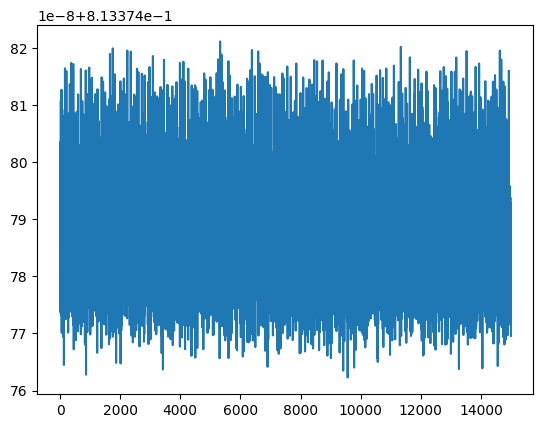

In [ ]:
plt.plot(loss_list[35000:])

Text(0.5, 1.0, 'Evolution of Loss Function (Negative Log-Likelihood)')

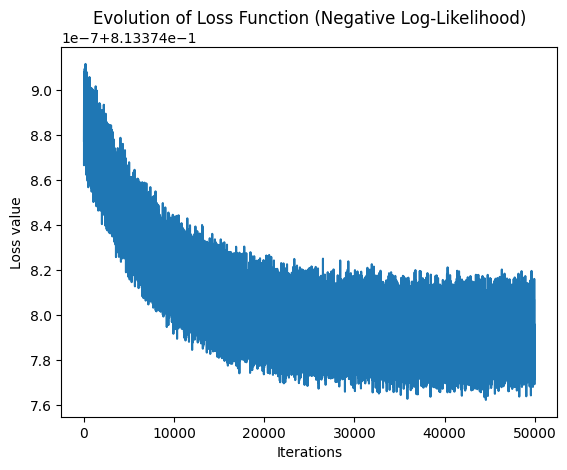

In [ ]:
plt.plot(loss_list[0:])
plt.xlabel("Iterations")
plt.ylabel("Loss value")
plt.title("Evolution of Loss Function (Negative Log-Likelihood)")

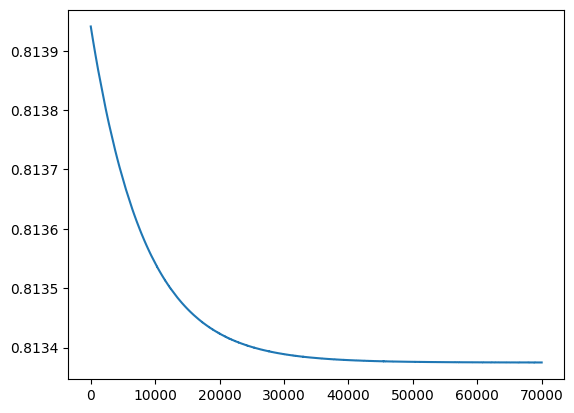

In [ ]:
plt.plot(loss_list[30000:])

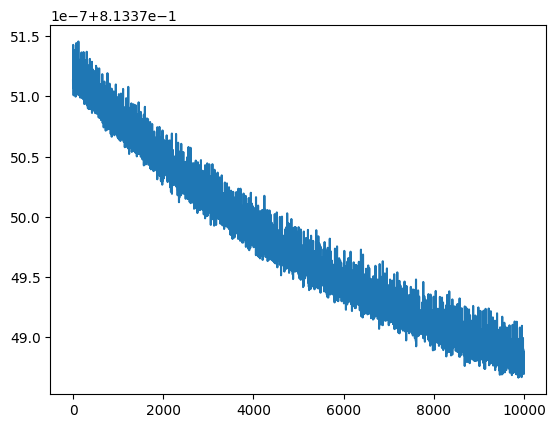

In [ ]:
plt.plot(loss_list[90000:])

In [ ]:
loss_list[0], best_loss

(0.8523054413430853, 0.8133748663001175)

In [ ]:
with open(f"{grp_to_use}_results_{num_epochs}_{learning_rate}.pickle", "wb") as picky:
    pickle.dump(
        {
            "best_params": best_params,
            "best_epoch": best_epoch,
            "best_loss": best_loss,
            "loss_list": loss_list,
        },
        picky,
    )

f"{grp_to_use}_results_{num_epochs}_{learning_rate}.pickle"

'B_results_50000_0.007.pickle'

C:\Users\Anurag Kadam\AppData\Local\Temp\ipykernel_4600\728299046.py:14: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(5, 2, n + 1)


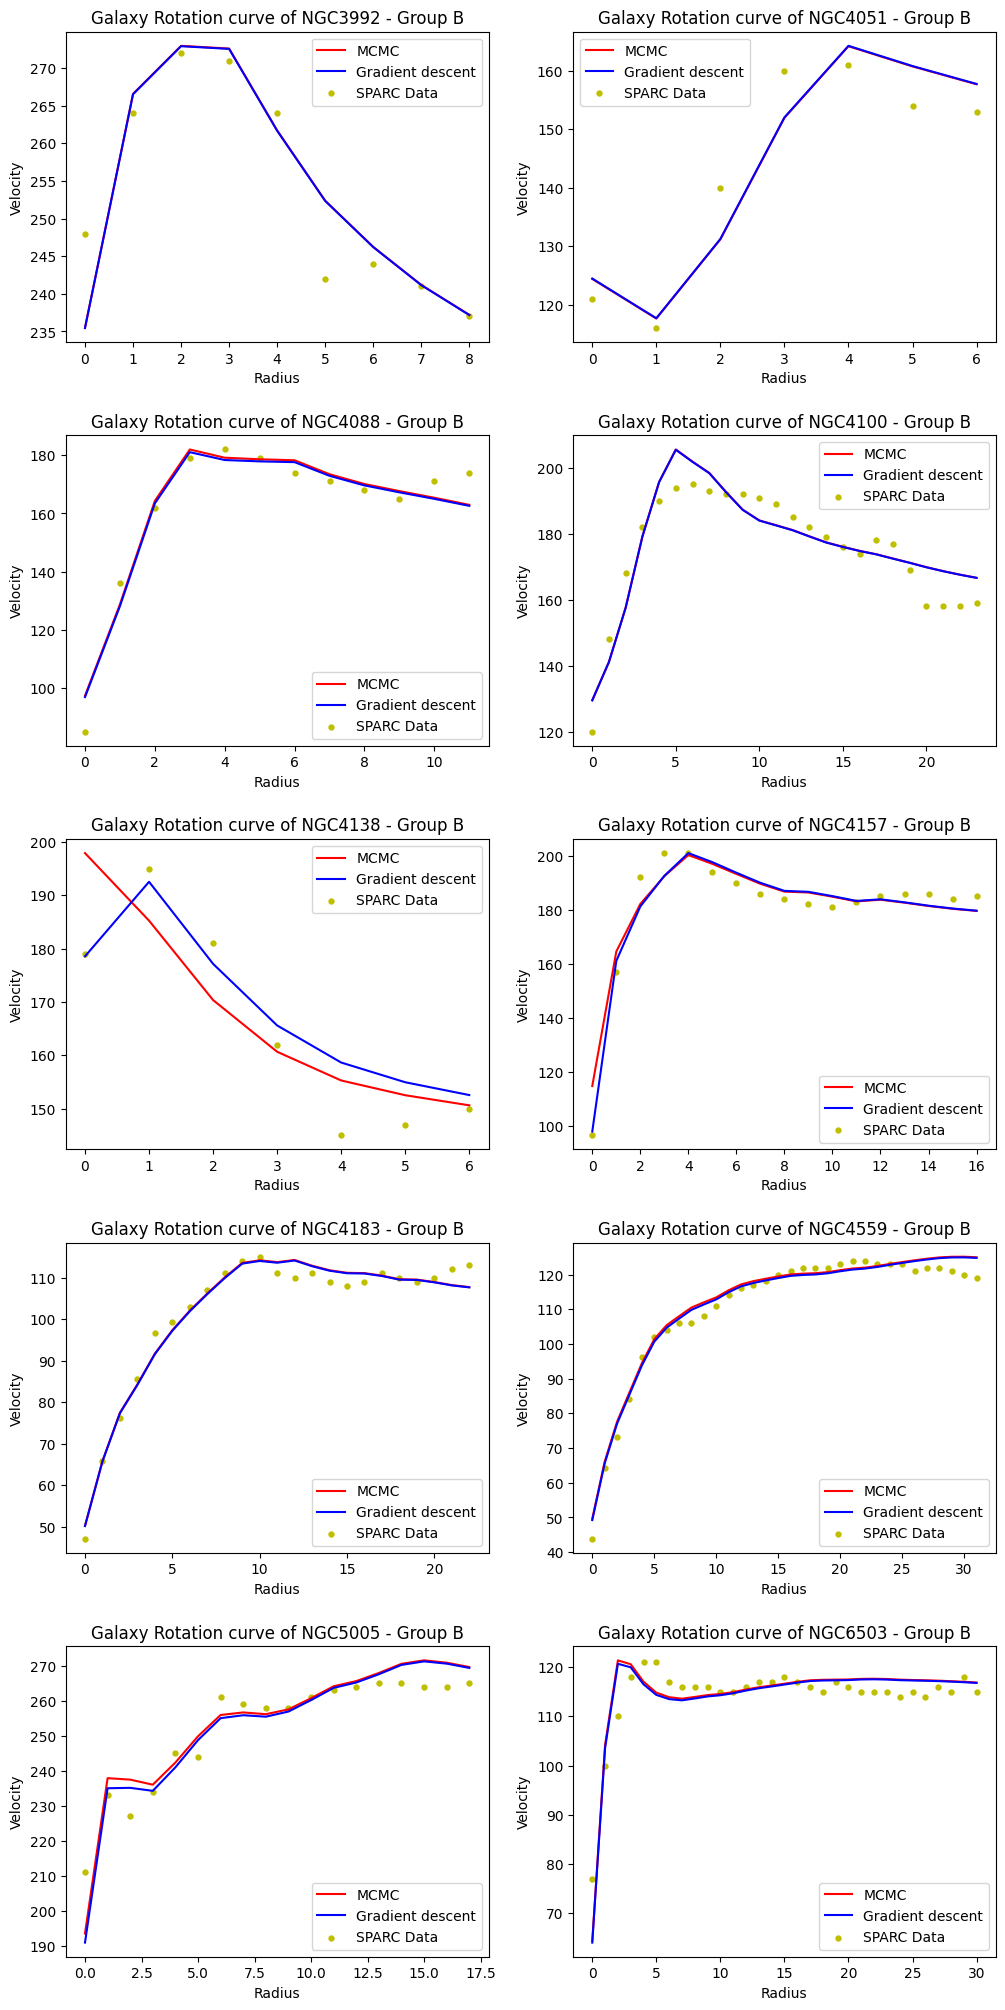

In [19]:
with open("B_results_50000_0.007.pickle", "rb") as f:
    our = pickle.load(f)

their = [
    np.array(grp_selection_dict[grp_to_use + "_m200"]),
    np.array(grp_selection_dict[grp_to_use + "_gam_D"]),
    np.array(grp_selection_dict[grp_to_use + "_gam_B"]),
]

curr_idx = 0
plt.subplots(figsize=(12, 25))

for n, gal in enumerate(gals_grp):
    plt.subplot(5, 2, n + 1)
    plt.plot(
        Vc_model(their)().detach().numpy()[curr_idx : curr_idx + num_dpoints_in_gal[n]],
        "red",
    )
    plt.plot(
        Vc_model(
            list(
                map(
                    lambda x: x.detach().numpy(),
                    our["best_params"],
                )
            )
        )()
        .detach()
        .numpy()[curr_idx : curr_idx + num_dpoints_in_gal[n]],
        "b",
    )
    plt.scatter(
        range(num_dpoints_in_gal[n]),
        torch_SPARC["Vobs"][curr_idx : curr_idx + num_dpoints_in_gal[n]],
        color="y",
        marker=".",
        s=50,
    )

    plt.legend(["MCMC", "Gradient descent", "SPARC Data"])
    plt.xlabel("Radius")
    plt.ylabel("Velocity")
    plt.title(f"Galaxy Rotation curve of {gal} - Group {grp_to_use}")
    # plt.show()
    curr_idx = curr_idx + num_dpoints_in_gal[n]

plt.subplots_adjust(wspace=0.2, hspace=0.3)